In [1]:
import tensorflow as tf   #mail library which help computer to understand the plant disease
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',          # Path to the directory containing the training images
    labels='inferred',         # Automatically infers labels from the directory structure
    label_mode='categorical',  # Labels are returned as one-hot encoded vectors
    image_size=(128, 128),     # Resizes all images to 256x256 pixels
    class_names=None,          # Class names are inferred from the directory structure
    color_mode='rgb',          # Loads images in RGB mode
    batch_size=32,             # Number of images to return in each batch
    shuffle=True,              # Shuffles the data
    seed=123,                  # Seed for random number generator (for reproducibility)
    validation_split=None,     # No validation split
    subset=None,               # No subset (use the entire dataset)
    interpolation='bilinear',  # Interpolation method used when resizing images
    follow_links=False,         # Whether to follow symbolic links
    crop_to_aspect_ratio=False # Whether to crop the images to match the aspect ratio
)
class_names = validation_set.class_names
print(class_names)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [4]:
cnn = tf.keras.models.load_model('Plant_Identification.keras')

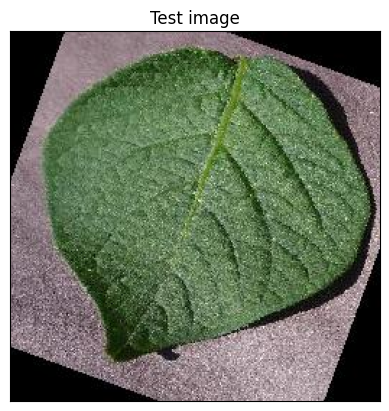

In [5]:
# Test image visualization
import cv2
import matplotlib.pyplot as plt

image_path = 'Dataset/train/Potato___healthy/ff700844-68ad-4e99-8427-58a39c07f817___RS_HL 1860_new200degFlipLR.JPG'
# Reading an image in default mode
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded correctly.")
else:
    # Converting the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(image)
    plt.title('Test image')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)    # Generate predictions for the input image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


In [7]:
print(predictions)

[[1.02010977e-09 1.28292377e-04 1.69130040e-11 7.79628540e-09
  1.33499087e-13 4.20192325e-09 1.48713440e-07 4.88126171e-11
  1.43105805e-11 2.40328726e-14 5.61128563e-14 2.54507006e-12
  2.77535834e-13 1.62509207e-13 2.30198902e-10 1.86263358e-13
  4.72913072e-12 7.41109188e-11 2.17700649e-11 8.80298430e-08
  4.44773003e-11 1.19962804e-10 9.99796093e-01 9.68619185e-10
  6.31028918e-09 1.77078404e-12 1.50385301e-10 2.35181844e-07
  3.01370474e-12 2.82115153e-09 9.39074860e-12 2.86453397e-13
  4.68426686e-10 2.57575672e-13 7.49314786e-05 6.39313838e-14
  7.78865375e-11 2.45585539e-07]]


In [8]:
result_index = np.argmax(predictions) # Return ndex max eliment
print(result_index)

22


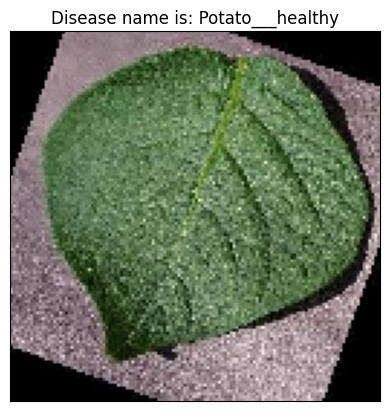

In [9]:
# displayong the disease prediction
model_prediction = class_names[result_index]
plt.imshow(image)
plt.title('Disease name is: ' + model_prediction)
plt.xticks([])  
plt.yticks([])
plt.show()